In [1]:
using TopOpt

In [2]:
?HalfMBB

search: HalfMBB



```
 |
 |
 v
O*********************************
O*                               *
O*                               *
O*                               *
O*********************************
                                 O

struct HalfMBB{dim, T, N, M} <: StiffnessTopOptProblem{dim, T}
    rect_grid::RectilinearGrid{dim, T, N, M}
    E::T
    ν::T
    ch::ConstraintHandler{DofHandler{dim, N, T, M}, T}
    force::T
    force_dof::Int
    metadata::Metadata
end
```

`dim`: dimension of the problem

`T`: number type for computations and coordinates

`N`: number of nodes in a cell of the grid

`M`: number of faces in a cell of the grid

`rect_grid`: a RectilinearGrid struct

`E`: Young's modulus

`ν`: Poisson's ration

`ch`: a JuAFEM.ConstraintHandler struct

`force`: force at the top left of half the MBB (positive is downward)

`force_dof`: dof number at which the force is applied

`metadata`:: Metadata having various cell-node-dof relationships

API:

```
    HalfMBB(nels::NTuple{dim,Int}, sizes::NTuple{dim}, E, ν, force) where {dim}
```

Example:

```

nels = (60,20);
sizes = (1.0,1.0);
E = 1.0;
ν = 0.3;
force = -1.0;
problem = HalfMBB(nels, sizes, E, ν, force)
```


In [3]:
problem = HalfMBB((60,20), (1.,1.), 1., 0.3, 1.);


            the name starts with the reserved prefix gl_

            the name starts with the reserved prefix gl_


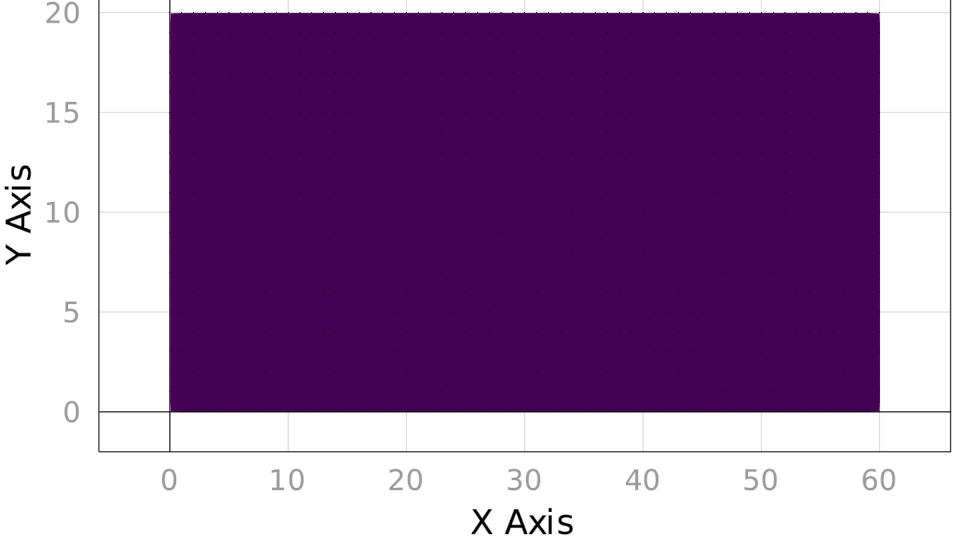

In [4]:
visualize(problem)

In [5]:
#solver = FEASolver(Displacement, CG, MatrixFree, problem);
#solver = FEASolver(Displacement, CG, Assembly, problem, cg_max_iter=1000);
solver = FEASolver(Displacement, Direct, problem, xmin = 0.001, quad_order = 2, penalty=TopOpt.PowerPenalty(1.));


            the name starts with the reserved prefix gl_


In [6]:
obj = ComplianceObj(problem, solver, filtering = true, rmin = 3., tracing = true, logarithm = false);

In [7]:
constr = VolConstr(problem, solver, 0.5);

In [8]:
nel = length(problem.ch.dh.grid.cells)
grad = zeros(nel)
x = ones(nel)
obj(x, grad)

114.51294186543771

In [9]:
x = rand(nel)
constr(x, grad)

-0.002904879381664116

In [10]:
optimizer = MMAOptimizer(obj, constr, ConjugateGradient, max_iters=400);
simp = SIMP(optimizer, 3.);

In [11]:
T = Float64

Float64

In [12]:
x0 = ones(T, length(solver.vars));
result = simp(x0)

TopOpt.SIMPResult{Float64}([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 176.92949502698454, 53, 0.1470148300993933, false, 0.07094177740086138, true, 4.605935849970352, false)


            the name starts with the reserved prefix gl_

            the name starts with the reserved prefix gl_


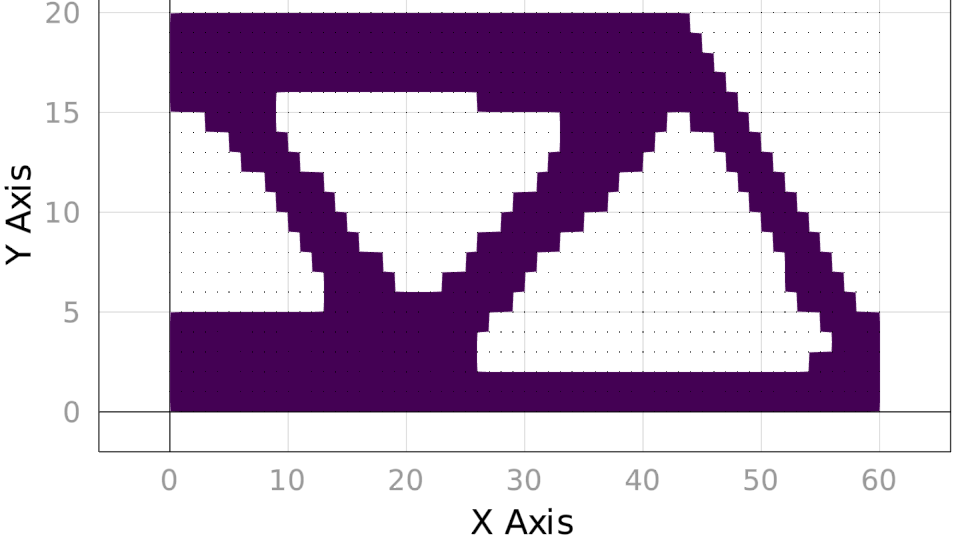

In [13]:
visualize(problem, result.topology)

In [14]:
result.objval


            the name starts with the reserved prefix gl_


176.92949502698454

In [15]:
dot(result.topology, constr.cell_volumes) # final solution volume

599.9457007690264

In [16]:
result.fevals

53


            the name starts with the reserved prefix gl_

            the name starts with the reserved prefix gl_


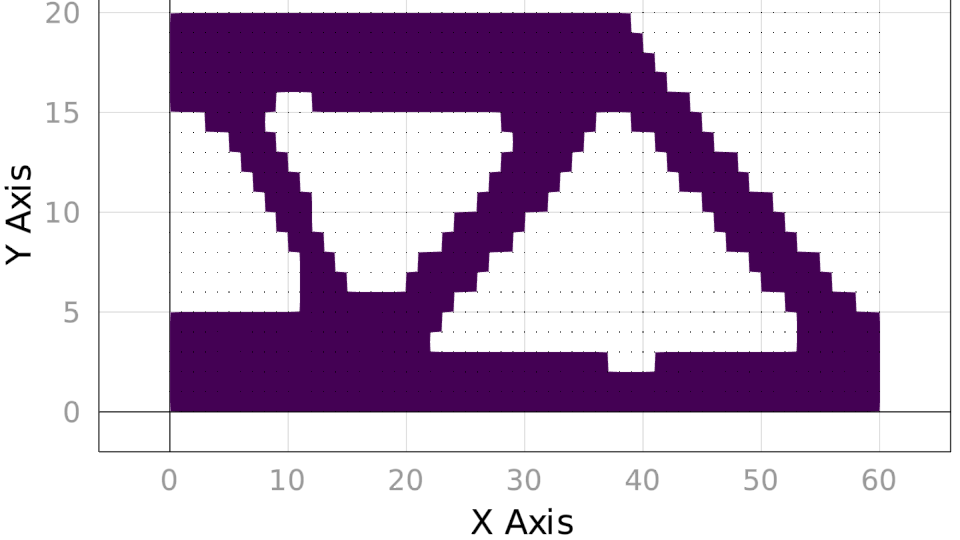

In [17]:
beso = BESO(obj, constr, maxiter = 100)
result = beso(ones(nel))
visualize(problem, result.topology)

In [18]:
result.objval


            the name starts with the reserved prefix gl_


177.01525047779353

In [19]:
dot(result.topology, constr.cell_volumes) # final solution volume

600.0

In [20]:
result.fevals

55

In [22]:
save_mesh("output_topology", problem, result.topology)

1-element Array{String,1}:
 "output_topology.vtu"